In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('student_clustering.csv')
print('The shape of data is ' , df.shape)
df.head()

The shape of data is  (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


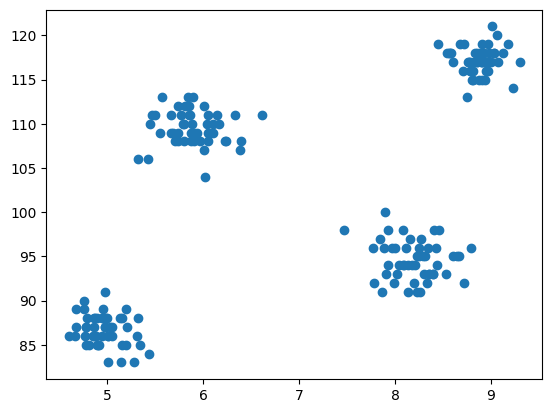

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

wcss

[29957.898288,
 4184.14127,
 2503.397581,
 681.96966,
 556.6603823704867,
 437.3836088655579,
 409.4438340720873,
 278.1558794782156,
 247.19977217734768,
 189.2626366145888]

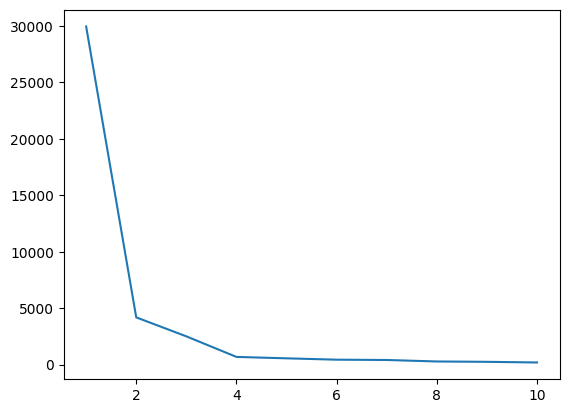

In [6]:
plt.plot(range(1,11),wcss)

In [8]:
# hence from the above graph we can say that the number of clusters should be 4.

X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
y_means

array([3, 2, 0, 0, 2, 2, 0, 1, 2, 0, 3, 2, 0, 3, 2, 0, 2, 0, 2, 2, 0, 3,
       0, 3, 3, 0, 3, 1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 3, 2, 3, 0, 0, 3,
       1, 1, 0, 2, 1, 2, 3, 3, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 3, 1,
       0, 3, 2, 0, 2, 1, 0, 3, 2, 1, 2, 1, 3, 0, 0, 1, 2, 3, 1, 3, 1, 2,
       1, 2, 1, 1, 0, 3, 0, 0, 1, 0, 3, 1, 2, 3, 3, 1, 3, 3, 0, 3, 1, 1,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 0, 0, 2,
       3, 3, 2, 1, 2, 3, 0, 0, 0, 3, 2, 3, 3, 1, 3, 1, 2, 3, 1, 3, 1, 1,
       3, 0, 2, 1, 2, 0, 3, 1, 2, 0, 1, 3, 2, 3, 3, 1, 1, 2, 1, 3, 3, 0,
       1, 2, 3, 1, 1, 2, 2, 2, 0, 3, 0, 0, 1, 2, 0, 0, 3, 3, 0, 3, 1, 2,
       2, 1])

In [9]:
X[y_means==1]
# all the rows that lie in cluster 1

array([[  8.8 , 115.  ],
       [  9.18, 119.  ],
       [  8.86, 117.  ],
       [  8.83, 118.  ],
       [  8.56, 118.  ],
       [  8.96, 116.  ],
       [  8.78, 116.  ],
       [  8.45, 119.  ],
       [  8.79, 116.  ],
       [  8.81, 115.  ],
       [  8.88, 115.  ],
       [  9.07, 117.  ],
       [  8.92, 118.  ],
       [  8.75, 113.  ],
       [  8.71, 116.  ],
       [  8.86, 118.  ],
       [  9.3 , 117.  ],
       [  9.01, 121.  ],
       [  8.97, 116.  ],
       [  9.  , 117.  ],
       [  8.76, 117.  ],
       [  8.78, 117.  ],
       [  9.23, 114.  ],
       [  9.03, 118.  ],
       [  9.13, 118.  ],
       [  8.91, 119.  ],
       [  8.98, 118.  ],
       [  9.03, 118.  ],
       [  8.86, 117.  ],
       [  8.89, 118.  ],
       [  8.97, 117.  ],
       [  8.72, 119.  ],
       [  8.93, 118.  ],
       [  8.58, 118.  ],
       [  8.94, 117.  ],
       [  8.6 , 117.  ],
       [  8.77, 117.  ],
       [  8.81, 116.  ],
       [  8.54, 118.  ],
       [  8.97, 119.  ],


In [10]:
X[y_means==3,0]
# 3rd cluster m lie krne vale sbhi rows ki 1st column ajaegi

array([5.13, 4.6 , 5.  , 4.86, 4.78, 4.96, 4.86, 5.44, 5.34, 5.31, 5.14,
       4.95, 5.21, 4.91, 5.28, 5.15, 4.9 , 4.89, 5.05, 4.98, 5.01, 4.95,
       4.96, 4.85, 4.76, 4.98, 4.78, 5.2 , 5.05, 5.01, 4.77, 4.68, 4.81,
       5.03, 4.98, 5.32, 4.86, 4.89, 4.88, 5.01, 4.67, 5.15, 4.97, 4.87,
       5.2 , 4.99, 4.79, 4.76, 4.78, 4.68])

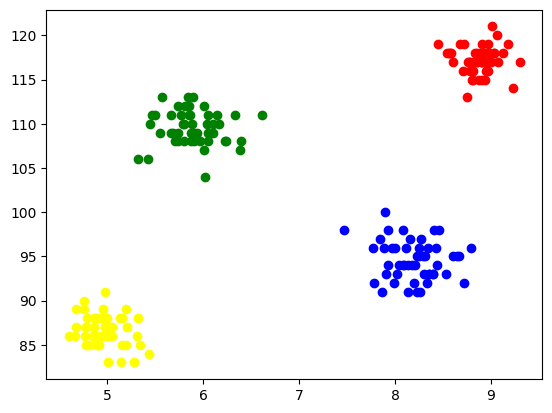

In [11]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color = 'blue')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color = 'red')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], color = 'green')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], color = 'yellow')


KMeans on 3D data


In [12]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

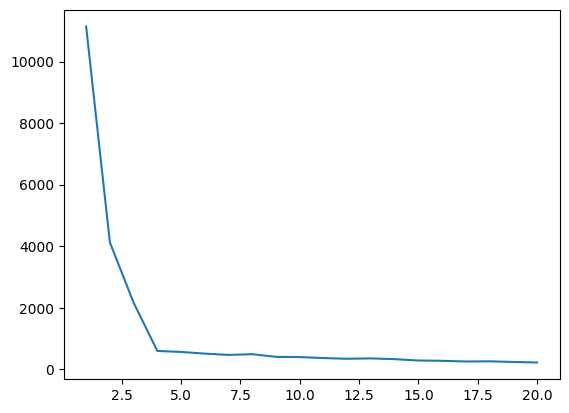

In [13]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

plt.plot(range(1,21),wcss)

In [14]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()